<a href="https://colab.research.google.com/github/vfrancois9/Audencia/blob/main/Income_Vanessa_Francois.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("Income2.csv")
# To display the top 10 rows 
df.head(10)  

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922
5,6,18.275862,26.206897,71.504485
6,7,19.931034,150.344828,87.970467
7,8,21.172414,82.068966,79.811030
8,9,20.344828,88.275862,90.006327
9,10,10.000000,113.103448,45.655530


In [ ]:
df.dtypes

Unnamed: 0      int64
Education     float64
Seniority     float64
Income        float64
dtype: object

In [ ]:
required_df = df[['Income', 'Education']]
required_df.describe()

,Income,Education
count,30.000000,30.000000
mean,62.744733,16.386207
std,27.013285,3.810622
min,17.613593,10.000000
25%,36.392043,12.482759
50%,70.804791,17.034483
75%,85.930608,19.931034
max,99.917173,21.586207


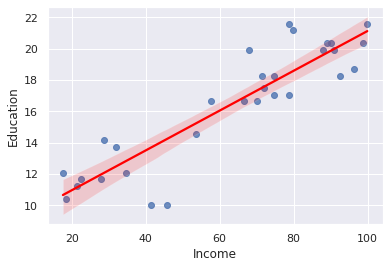

In [ ]:
sns.regplot(x="Income", y="Education", data=required_df, line_kws={'color':'red'})
plt.show()

In [ ]:
import statsmodels.formula.api as smf
lin_model = smf.ols("Income ~ Education", data=required_df).fit()
lin_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     120.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.15e-11
Time:                        08:54:38   Log-Likelihood:                -115.90
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9166      9.769     -4.291      0.000     -61.927     -21.906
Education      6.3872      0.581     10.990      0.000       5.197       7.578
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.652
Skew:                           0.140   Prob(JB):                        0.722
Kurtosis:                       2.335   Cond. No.                         75.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

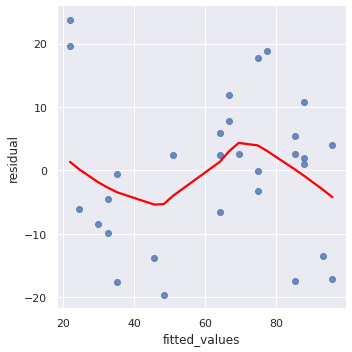

In [ ]:
temp_data = pd.DataFrame(dict(fitted_values=lin_model.fittedvalues, residual=lin_model.resid))
graph = sns.lmplot(x='fitted_values', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})
plt.show()

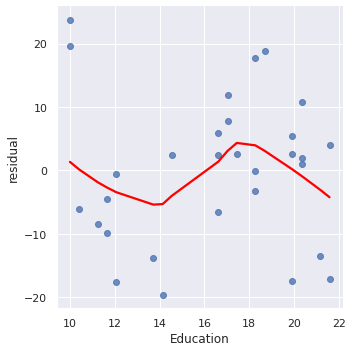

In [ ]:
temp_data = pd.DataFrame(dict(Education=required_df.Education, residual=lin_model.resid))
graph = sns.lmplot(x='Education', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


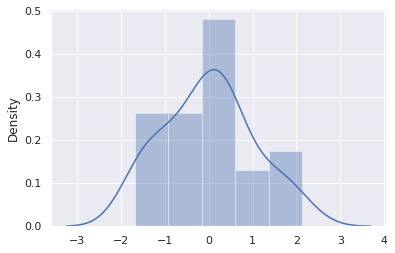

In [ ]:
sns.distplot(lin_model.get_influence().resid_studentized_internal)
plt.show()

In [ ]:
quad_model = smf.ols("Income ~ Education + np.square(Education) + np.power(Education,3)", data=df[['Income','Education']].reset_index()).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     74.81
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           6.48e-13
Time:                        09:32:02   Log-Likelihood:                -106.97
No. Observations:                  30   AIC:                             221.9
Df Residuals:                      26   BIC:                             227.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                797.1337    185.140      4.306      0.000     416.573    1177.694
Education               -162.2695     36.881     -4.400      0.000    -238.080     -86.459
np.square(Education)      10.8898      2.371      4.594      0.000       6.017      15.763
np.power(Education, 3)    -0.2272      0.049     -4.595      0.000      -0.329      -0.126
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.417
Skew:                          -0.271   Prob(JB):                        0.812
Kurtosis:                       2.799   Cond. No.                     6.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

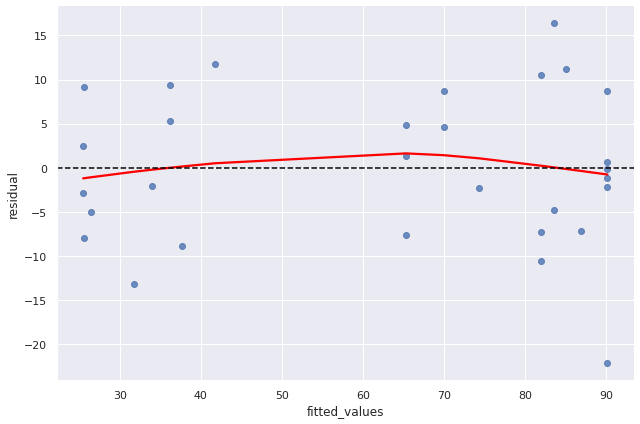

In [ ]:
temp_data = pd.DataFrame(dict(fitted_values=quad_model.fittedvalues, residual=quad_model.resid))
graph = sns.lmplot(x='fitted_values', y='residual', data=temp_data, lowess=True, height=6, aspect=1.5,
                line_kws={'color':'red'})
graph.axes[0][0].axhline(0, color='black', ls='--')
plt.show()